# **Numpy, Matplotlib, and Linear Algebra**

## **0. Introduction**

- 지난주에는 파이썬을 이용하여 프로그래밍의 기초에 대해 학습하였는데, 어떠셨나요?
    - 지난주에 학습하면서 느꼈던 감정을 노션의 세션 페이지에 적어주세요!
- 이번주차에는 `numpy`와 `matplotlib`, 그리고 이를 활용하여 선형대수를 학습해보겠습니다! 👏

## **1. Numpy**

- **NumPy (Numerical Python)** is a first-rate library for **numerical programming**.
    - Widely used in academia, finance and industry.
    - Mature, fast, stable and under continuous development.
- We have already seen some code involving NumPy in the preceding note (week 1).
- In this note, we will start a more systematic discussion of both
    - NumPy **arrays** and (넘파이 배열이 무엇인지)
    - the fundamental **array processing operations** provided by NumPy. (배열을 다루는 방법에는 무엇이 있는지)

### 1.1. Numpy Arrays

- The essential problem that NumPy solves is **fast array processing**.
- The most important structure that NumPy defines is an array data type formally called a `numpy.ndarray`.
    - 이번 주차의 핵심 주제 중 하나는 `numpy.ndarray`를 자유자재로 다룰 수 있는 방법을 학습하는 것입니다.
- NumPy arrays power a large proportion of the scientific Python ecosystem.
- Let’s first import the library.

In [49]:
import numpy as np

- To create a NumPy array containing only zeros, we use `np.zeros`

In [2]:
# 괄호 안 인자로는 일반적으로 배열의 모양(shape)을 씁니다.
# shape이 무엇인지는 나중에 더 자세히 배웁니다.
a = np.zeros(3) # 0 세 개로 이루어진 넘파이 배열을 변수 a에 할당한다.
a

array([0., 0., 0.])

In [3]:
type(a)

numpy.ndarray

- NumPy arrays are somewhat like native Python lists, except that
    - Data must be homogeneous (all elements of the same type).
    - These types must be one of the data types (`dtypes`) provided by NumPy.
- The most important of these dtypes are:
    - float64: 64 bit floating-point number
    - int64: 64 bit integer
    - bool: 8 bit True or False
- There are also dtypes to represent complex numbers, unsigned integers, etc.
- On modern machines, the default dtype for arrays is `float64`.

In [6]:
# Note that the data type of an element of numpy.ndarray is not simply `float` but `numpy.float64`.
a = np.zeros(3)
type(a[0])

numpy.float64

- If we want to use integers we can specify as follows:

In [8]:
# Similarly, Numpy uses its own data type. (`numpy.int64` in this case)
a = np.zeros(3, dtype=int)
type(a[0])

numpy.int64

#### 1.1.1. Shape and Dimension

- Consider the following assignment

In [12]:
z = np.zeros(10)
z

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

- Here `z` is a flat array with no dimension — neither row nor column vector.
- The dimension is recorded in the `shape` attribute, which is a tuple.

In [10]:
z.shape

(10,)

- Here the shape tuple has only one element, which is the length of the array (tuples with one element end with a comma).
- To give it dimension, we can change the `shape` attribute

In [11]:
z.shape = (10, 1)
z

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
z = np.zeros(4)
z.shape = (2, 2)
z

- In the last case, to make the 2 by 2 array, we could also pass a tuple to the `zeros()` function, as in `z = np.zeros((2, 2))`.

In [13]:
z = np.zeros((2, 2))
z

array([[0., 0.],
       [0., 0.]])

#### 1.1.2. Creating Arrays

- As we’ve seen, the `np.zeros` function creates an array of zeros.
- You can probably guess what `np.ones` creates.
- Related is `np.empty`, which creates arrays in memory that can later be populated with data.

In [15]:
z = np.ones(3)
z

array([1., 1., 1.])

In [25]:
z = np.empty(4)
z

array([1., 1., 1.])

- The numbers you see here are garbage values.
(Python allocates 3 contiguous 64 bit pieces of memory, and the existing contents of those memory slots are interpreted as float64 values)

- To set up a grid of evenly spaced numbers use `np.linspace`

In [26]:
z = np.linspace(2, 4, 5)  # From 2 to 4, with 5 elements
z

array([2. , 2.5, 3. , 3.5, 4. ])

- To create an identity matrix use either `np.identity` or `np.eye`

In [27]:
z = np.identity(2)
z

array([[1., 0.],
       [0., 1.]])

In [28]:
z = np.eye(2)
z

array([[1., 0.],
       [0., 1.]])

- In addition, NumPy arrays can be **created from Python lists, tuples, etc.** using `np.array`.

In [30]:
z = np.array([10, 20])  # ndarray from Python list
z

array([10, 20])

In [31]:
type(z)

numpy.ndarray

In [32]:
z = np.array((10, 20), dtype=float)    # Here 'float' is equivalent to 'np.float64'
z

array([10., 20.])

In [33]:
z = np.array([[1, 2], [3, 4]])         # 2D array from a list of lists
z

array([[1, 2],
       [3, 4]])

- See also `np.asarray`, which performs a similar function, but does not make a distinct copy of data already in a NumPy array.
- **Search!** `np.asarray`와 `np.array`의 차이를 인터넷 검색을 통해 찾아보세요!

In [34]:
na = np.linspace(10, 20, 2)
na is np.asarray(na)   # Does not copy NumPy arrays

True

In [37]:
na is np.array(na)     # Does make a new copy --- perhaps unnecessarily

False

In [40]:
np.asarray

- To read in the array data from a text file containing numeric data use `np.loadtxt` or` np.genfromtxt`—see the [documentation](https://numpy.org/doc/stable/reference/routines.io.html) for details.
    - 단, 넘파이는 수 데이터(numeric data)를 다루는 데 특화돼있습니다.

#### 1.1.3. Array Indexing

- For a flat array, indexing is the same as Python sequences:

In [41]:
z = np.linspace(1, 2, 5)
z

array([1.  , 1.25, 1.5 , 1.75, 2.  ])

In [42]:
z[0]

1.0

In [43]:
z[0:2]  # Two elements, starting at element 0

array([1.  , 1.25])

In [44]:
z[-1]

2.0

- For 2D arrays the index syntax is as follows:

In [45]:
z = np.array([[1, 2], [3, 4]])
z

array([[1, 2],
       [3, 4]])

In [46]:
z[0, 0]

1

In [47]:
z[0, 1]

2

- And so on.
- Note that **indices are still zero-based**, to maintain compatibility with Python sequences.
    - 순서는 항상 0부터 셉니다.
- Columns and rows can be extracted as follows:

In [48]:
z[0, :] # 1st row

array([1, 2])

In [49]:
z[:, 1] # 2nd column

array([2, 4])

- NumPy arrays of **integers can also be used to extract elements:**

In [50]:
z = np.linspace(2, 4, 5)
z

array([2. , 2.5, 3. , 3.5, 4. ])

In [52]:
indices = np.array((0, 2, 3))
z[indices] # 1st, 3rd, 4th element of z; output is a numpy.array

array([2. , 3. , 3.5])

- Finally, an array of **dtype bool can be used to extract elements**.

In [53]:
z

array([2. , 2.5, 3. , 3.5, 4. ])

In [54]:
d = np.array([0, 1, 1, 0, 0], dtype=bool) # if 0, then false; if 1, then true.
d

array([False,  True,  True, False, False])

In [55]:
z[d] # True인 자리의 원소를 추출한다.

array([2.5, 3. ])

- We’ll see why this is useful below.
- An aside: all elements of an array can be set equal to one number using slice notation (슬라이싱을 이용하여 원소를 통일할 수 있습니다.).

In [56]:
z = np.empty(3)
z

array([0.0e+000, 9.9e-324, 1.5e-323])

In [58]:
z[:] = 42 # all elements of an array are set equal
z

array([42., 42., 42.])

#### 1.1.4. Array Methods

- Arrays have useful methods, all of which are carefully optimized.

In [59]:
a = np.array((4, 3, 2, 1))
a

array([4, 3, 2, 1])

In [60]:
a.sort()              # Sorts a in place
a

array([1, 2, 3, 4])

In [61]:
a.sum()               # Sum

10

In [62]:
a.mean()              # Mean

2.5

In [63]:
a.max()               # Max

4

In [64]:
a.argmax()            # Returns the `index` of the maximal element

3

In [65]:
a.cumsum()            # Cumulative sum of the elements of a; [1st, 1st+2nd, 1st+2nd+3rd, 1st+2nd+3rd+4th, ...]

array([ 1,  3,  6, 10])

In [66]:
a.cumprod()           # Cumulative product of the elements of a; [1st, 1st*2nd, 1st*2nd*3rd, 1st*2nd*3rd*4th, ...]

array([ 1,  2,  6, 24])

In [67]:
a.var()               # Variance

1.25

In [68]:
a.std()               # Standard deviation

1.118033988749895

In [71]:
a.shape = (2, 2)
print(a)
print()
a.T                   # Equivalent to a.transpose()

[[1 2]
 [3 4]]



array([[1, 3],
       [2, 4]])

- Another method worth knowing is `searchsorted()`.
- If `z` is a nondecreasing array, then `z.searchsorted(a)` returns the index of the first element of z that is `>= a`.

In [73]:
z = np.linspace(2, 4, 5)
z

array([2. , 2.5, 3. , 3.5, 4. ])

In [74]:
z.searchsorted(2.2) # 2nd element

1

- Many of the methods discussed above have equivalent functions in the NumPy namespace.
    - 서로 다른 형태지만 같은 결과를 도출하는 몇몇 함수가 존재합니다.
```python
np.function_name(array) == array.function_name()
```

In [75]:
a = np.array((4, 3, 2, 1))

In [76]:
np.sum(a)

10

In [77]:
np.mean(a)

2.5

### 1.2. Arithmetic Operations

- The operators `+`, `-`, `*`, `/` and `**` all act **elementwise** on arrays
    - 서로 다른 두 배열의 같은 위치의 원소끼리 연산을 합니다.

In [78]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])
a + b

array([ 6,  8, 10, 12])

In [79]:
a * b

array([ 5, 12, 21, 32])

- We can add a scalar to each element as follows

In [80]:
a + 10

array([11, 12, 13, 14])

- Scalar multiplication is similar

In [81]:
a * 10

array([10, 20, 30, 40])

- The two-dimensional arrays follow the same general rules : an **elementwise** operation

In [82]:
A = np.ones((2, 2))
B = np.ones((2, 2))
A + B

array([[2., 2.],
       [2., 2.]])

In [83]:
A + 10

array([[11., 11.],
       [11., 11.]])

In [84]:
A * B

array([[1., 1.],
       [1., 1.]])

- In particular, `A * B` is not the matrix product, it is an element-wise product.
    - 흔히 수학에서 쓰이는 행렬곱은 1.3에서 다룬다.

### 1.3. Matrix Multiplication

- With Anaconda’s scientific Python package based around Python 3.5 and above, one can use the `@` symbol for matrix multiplication, as follows:

In [85]:
A = np.ones((2, 2))
B = np.ones((2, 2))
A @ B

array([[2., 2.],
       [2., 2.]])

- For older versions of Python and NumPy you need to use the `np.dot` function
- We can also use @ to take the **inner product** of two **flat** arrays.

In [86]:
A = np.array((1, 2))
B = np.array((10, 20))
A @ B # 1*10 + 2*20

50

- In fact, we can use `@` when one element is a Python `list` or `tuple`.

In [87]:
A = np.array(((1, 2), (3, 4)))
A

array([[1, 2],
       [3, 4]])

In [88]:
A @ (0, 1)

array([2, 4])

- Since we are post-multiplying, **the tuple is treated as a column vector**.

In [89]:
(0, 1) @ A # (0, 1) here is a row vector.

array([3, 4])

### 1.4. Broadcasting

> - Broadcasting is a very important aspect of NumPy.
- At the same time, advanced broadcasting is relatively complex and some of the details below can be skimmed on first pass.

- In element-wise operations, arrays may not have the same shape.
- When this happens, **NumPy will automatically expand arrays to the same shape whenever possible**.
- This useful (but sometimes confusing) feature in NumPy is called **broadcasting**.
- The value of broadcasting is that
    - `for` loops can be avoided, which helps numerical code run fast and
    - broadcasting can allow us to implement operations on arrays without actually creating some dimensions of these arrays in memory, which can be important when arrays are large.

- For example, suppose `a` is a 3 × 3 array (`a -> (3, 3)`), while `b` is a flat array with three elements (`b -> (3,)`).
- When adding them together, NumPy will automatically expand `b -> (3,)` to `b -> (3, 3)`.
- The element-wise addition will result in a 3 × 3 array.

In [90]:
a = np.array(
        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]])
b = np.array([3, 6, 9])

a + b

array([[ 4,  8, 12],
       [ 7, 11, 15],
       [10, 14, 18]])

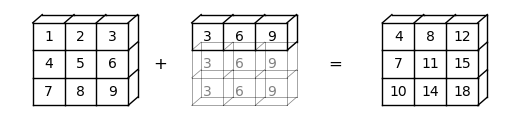

- How about `b -> (3, 1)`?
- In this case, NumPy will automatically expand `b -> (3, 1)` to `b -> (3, 3)`.
- Element-wise addition will then result in a 3 × 3 matrix.

In [91]:
b.shape = (3, 1)

a + b

array([[ 4,  5,  6],
       [10, 11, 12],
       [16, 17, 18]])

- Here is a visual representation of this broadcasting operation:

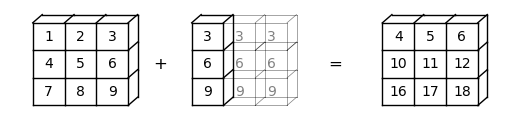

- The previous broadcasting operation is equivalent to the following `for` loop

In [ ]:
row, column = a.shape
result = np.empty((3, 3))
for i in range(row):
    for j in range(column):
        result[i, j] = a[i, j] + b[i]

result

- In some cases, both operands will be expanded.
- When we have `a -> (3,)` and `b -> (3, 1)`, a will be expanded to `a -> (3, 3)`, and `b` will be expanded to `b -> (3, 3)`.
- In this case, element-wise addition will result in a 3 × 3 matrix.

In [92]:
a = np.array([3, 6, 9])
b = np.array([2, 3, 4])
b.shape = (3, 1)

a + b

array([[ 5,  8, 11],
       [ 6,  9, 12],
       [ 7, 10, 13]])

- Here is a visual representation of this broadcasting operation:

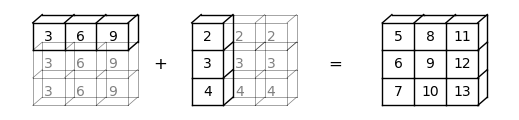

- While broadcasting is very useful, it can sometimes seem confusing.
- For example, let’s try adding `a -> (3, 2)` and `b -> (3,)`.

In [93]:
# 오류가 나야하는 코드입니다.
a = np.array(
      [[1, 2],
       [4, 5],
       [7, 8]])
b = np.array([3, 6, 9])

a + b

ValueError: ignored

- The `ValueError` tells us that operands could not be broadcast together.
- Here is a visual representation to show why this broadcasting cannot be executed:

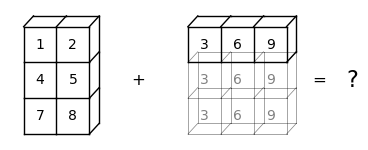

- We can see that NumPy cannot expand the arrays to the same size.
- It is because, when `b` is expanded from `b -> (3,)` to `b -> (3, 3)`, NumPy cannot match `b` with `a -> (3, 2)`.
- Things get even trickier when we move to higher dimensions.
- To help us, we can use the following list of rules:
    - Step 1: When the dimensions of two arrays do not match, NumPy will expand the one with fewer dimensions by adding dimension(s) on the left of the existing dimensions.
        - For example, if `a -> (3, 3)` and `b -> (3,)`, then broadcasting will add a dimension to the left so that `b -> (1, 3)`;
        - If `a -> (2, 2, 2)` and `b -> (2, 2)`, then broadcasting will add a dimension to the left so that `b -> (1, 2, 2)`;
        - If `a -> (3, 2, 2)` and `b -> (2,)`, then broadcasting will add two dimensions to the left so that `b -> (1, 1, 2)` (you can also see this process as going through Step 1 twice).
    - Step 2: When the two arrays have the same dimension but different shapes, NumPy will try to expand dimensions where the shape index is 1.
        - For example, if `a -> (1, 3)` and `b -> (3, 1)`, then broadcasting will expand dimensions with shape 1 in both `a` and `b` so that `a -> (3, 3)` and `b -> (3, 3)`;
        - If `a -> (2, 2, 2)` and `b -> (1, 2, 2)`, then broadcasting will expand the first dimension of b so that `b -> (2, 2, 2)`;
        - If `a -> (3, 2, 2)` and `b -> (1, 1, 2)`, then broadcasting will expand `b` on all dimensions with shape 1 so that `b -> (3, 2, 2)`.
- Here are code examples for broadcasting higher dimensional arrays

In [2]:
# a -> (2, 2, 2) and  b -> (1, 2, 2)

a = np.array(
    [[[1, 2],
      [2, 3]],

     [[2, 3],
      [3, 4]]])
print(f'the shape of array a is {a.shape}')

b = np.array(
    [[1,7],
     [7,1]])
print(f'the shape of array b is {b.shape}')

a + b

the shape of array a is (2, 2, 2)
the shape of array b is (2, 2)


array([[[ 2,  9],
        [ 9,  4]],

       [[ 3, 10],
        [10,  5]]])

In [3]:
# a -> (3, 2, 2) and b -> (2,)

a = np.array(
    [[[1, 2],
      [3, 4]],

     [[4, 5],
      [6, 7]],

     [[7, 8],
      [9, 10]]])
print(f'the shape of array a is {a.shape}')

b = np.array([3, 6])
print(f'the shape of array b is {b.shape}')

a + b

the shape of array a is (3, 2, 2)
the shape of array b is (2,)


array([[[ 4,  8],
        [ 6, 10]],

       [[ 7, 11],
        [ 9, 13]],

       [[10, 14],
        [12, 16]]])

- 이어서,
    - Step 3: After Step 1 and 2, if the two arrays still do not match, a `ValueError` will be raised.
        - For example, suppose `a -> (2, 2, 3)` and `b -> (2, 2)`
        - By Step 1, `b` will be expanded to `b -> (1, 2, 2)`;
        - By Step 2, `b` will be expanded to `b -> (2, 2, 2)`;
        - We can see that they do not match each other after the first two steps. Thus, a `ValueError` will be raised

In [4]:
a = np.array(
    [[[1, 2, 3],
      [2, 3, 4]],

     [[2, 3, 4],
      [3, 4, 5]]])
print(f'the shape of array a is {a.shape}')

b = np.array(
    [[1,7],
     [7,1]])
print(f'the shape of array b is {b.shape}')

a + b

the shape of array a is (2, 2, 3)
the shape of array b is (2, 2)


ValueError: ignored

### 1.5. Mutability and Copying Arrays

- NumPy arrays are mutable data types, like Python lists.
- In other words, their **contents can be altered (mutated) in memory after initialization**.
- We already saw examples above.
- Here’s another example:



In [5]:
a = np.array([42, 44])
a

array([42, 44])

In [6]:
a[-1] = 0  # Change last element to 0
a

array([42,  0])

- Mutability leads to the following behavior (which can be shocking to MATLAB programmers…)

In [7]:
a = np.random.randn(3)
a

array([ 0.15796704, -0.53875834,  0.29305947])

In [8]:
b = a
b[0] = 0.0
a

array([ 0.        , -0.53875834,  0.29305947])

- What’s happened is that we have changed `a` by changing `b`.
- The name `b` is bound to a and becomes just another reference to the array.
- Hence, it has equal rights to make changes to that array.
- This is in fact the most sensible default behavior!
- It means that **we pass around only pointers to data, rather than making copies**.
- **Making copies** is **expensive in terms of both speed and memory**.

#### 1.5.1. Making Copies

- It is of course possible to make `b` an independent copy of `a` when required.
- This can be done using `np.copy`.

In [9]:
a = np.random.randn(3)
a

array([ 0.312933  ,  0.15126491, -0.92265013])

In [10]:
b = np.copy(a)
b

array([ 0.312933  ,  0.15126491, -0.92265013])

- Now `b` is an independent copy (called a **deep copy**)

In [11]:
b[:] = 1
b

array([1., 1., 1.])

In [12]:
a

array([ 0.312933  ,  0.15126491, -0.92265013])

- Note that the change to `b` has not affected `a`.

### 1.6. Additional Functionality

- Let’s look at some other useful things we can do with NumPy.

#### 1.6.1. Vectorized Functions

- NumPy provides versions of the standard functions `log`, `exp`, `sin`, etc. that **act element-wise** on arrays

In [13]:
z = np.array([1, 2, 3])
np.sin(z)

array([0.84147098, 0.90929743, 0.14112001])

- This eliminates the need for explicit element-by-element loops such as
```python
n = len(z)
y = np.empty(n)
for i in range(n):
    y[i] = np.sin(z[i])
```

- Because they act element-wise on arrays, these functions are called **vectorized functions**.
- In NumPy-speak, they are also called **ufuncs**, which stands for “**universal functions**”.
- As we saw above, the usual arithmetic operations (`+`, `*`, etc.) also work element-wise, and combining these with the ufuncs gives a very large set of fast element-wise functions.

In [14]:
z

array([1, 2, 3])

In [15]:
(1 / np.sqrt(2 * np.pi)) * np.exp(- 0.5 * z**2)

array([0.24197072, 0.05399097, 0.00443185])

- Not all user-defined functions will act element-wise.
- For example, passing the function `f` defined below a NumPy array causes a `ValueError`.

In [16]:
def f(x):
    return 1 if x > 0 else 0

In [17]:
f(z)

ValueError: ignored

- The NumPy function `np.where` provides a vectorized alternative:

In [18]:
x = np.random.randn(4)
x

array([ 0.82534045,  1.47761144, -0.70529811,  1.0005438 ])

In [19]:
np.where(x > 0, 1, 0)  # Insert 1 if x > 0 true, otherwise 0

array([1, 1, 0, 1])

- You can also use `np.vectorize` to vectorize a given function

In [20]:
f = np.vectorize(f)
f(x)                # Passing the same vector x as in the previous example

array([1, 1, 0, 1])

- However, this approach doesn’t always obtain the same speed as a more carefully crafted vectorized function.

#### 1.6.2. Comparisons

- As a rule, **comparisons** on arrays are done **element-wise**.

In [21]:
z = np.array([2, 3])
y = np.array([2, 3])
z == y

array([ True,  True])

In [22]:
y[0] = 5
z == y

array([False,  True])

In [23]:
z != y

array([ True, False])

- The situation is similar for `>`, `<`, `>=` and `<=`.
- We can also do comparisons against scalars

In [24]:
z = np.linspace(0, 10, 5)
z

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [25]:
z > 3

array([False, False,  True,  True,  True])

- This is particularly **useful for conditional extraction**.

In [26]:
b = z > 3
b

array([False, False,  True,  True,  True])

In [27]:
z[b]

array([ 5. ,  7.5, 10. ])

- Of course we can—and frequently do—perform this in one step

In [28]:
z[z > 3]

array([ 5. ,  7.5, 10. ])

#### 9.7.3. Sub-packages

- NumPy provides some additional functionality related to scientific programming through its sub-packages.
- We’ve already seen how we can generate random variables using `np.random`

In [29]:
z = np.random.randn(10000)  # Generate standard normals
y = np.random.binomial(10, 0.5, size=1000)    # 1,000 draws from Bin(10, 0.5)
y.mean()

4.971

- Another commonly used subpackage is `np.linalg`

In [30]:
A = np.array([[1, 2], [3, 4]])

np.linalg.det(A)           # Compute the determinant

-2.0000000000000004

In [31]:
np.linalg.inv(A)           # Compute the inverse

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

- Much of this functionality is also available in **SciPy**, a collection of modules that are built on top of NumPy.
- We’ll not cover the SciPy, due to lack of time.
    - However, since it is also a useful package for us, it is highly recommended to study on your own by utilizing `google`. 😅
- For a comprehensive list of what’s available in NumPy see this [documentation](https://numpy.org/doc/stable/reference/routines.html).

**[Exercise]**
- Let’s revisit a bond pricing example we saw in Control flow.
- Recall that the equation for pricing a bond with coupon payment $C$, face value $M$, yield to maturity $i$, and periods to maturity $N$ is

$$ P = \left( \sum\limits^{N}_{n=1} \frac{C}{(1+i)^N} \right) +  \frac{M}{(1+i)^N} = C \left( \frac{1 - (1+i)^{-N}}{i} \right) + M (1+i)^{-N} $$

- In the code cell below, we have defined variables for `i`, `M` and `C`.
- You have two tasks:
    - Define a numpy array `N` that contains all maturities between 1 and 10 (Hint : look at the np.arange function.)
    - Using the equation above, determine the bond prices of all maturity levels in your array.

In [ ]:
i = 0.03
M = 100
C = 5

# Define array here

# price bonds here

## **2. Matplotlib**

### 2.1. Overview

- Matplotlib is an outstanding graphics library, designed for scientific computing, with
    - high-quality 2D and 3D plots
    - output in all the usual formats (PDF, PNG, etc.)
    - LaTeX integration
    - fine-grained control over all aspects of presentation
    - animation, etc.

#### 2.1.1. Matplotlib's Split Personality

- Matplotlib is unusual in that it offers two different interfaces to plotting.
    - One is a simple **MATLAB-style API** (Application Programming Interface) that was written to help MATLAB refugees find a ready home.
    - The other is a more **“Pythonic” object-oriented API**.
- For reasons described below, we recommend that you use the second API.
- But first, let’s discuss the difference.

### 2.2. The APIs

#### 2.2.1. The MATLAB-style API

- Here’s the kind of easy example you might find in introductory treatments

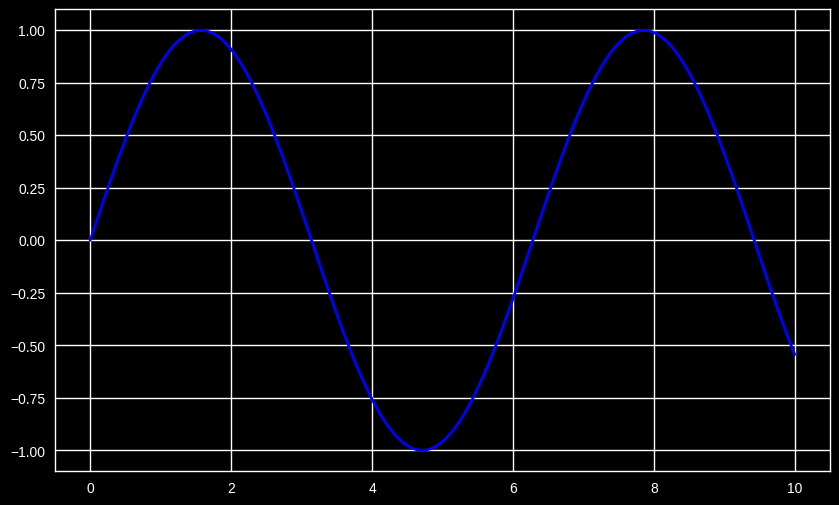

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6) #set default figure size
import numpy as np

x = np.linspace(0, 10, 200)
y = np.sin(x)

plt.plot(x, y, 'b-', linewidth=2)
plt.show()

- This is simple and convenient, but also somewhat limited and un-Pythonic.
    - For example, in the function calls, a lot of objects get created and passed around without making themselves known to the programmer.
- Python programmers tend to prefer a more explicit style of programming (run import this in a code block and look at the second line).
- This leads us to the alternative, object-oriented Matplotlib API.

#### 2.2.2. The Object-Oriented API

- Here’s the code corresponding to the preceding figure using the object-oriented API

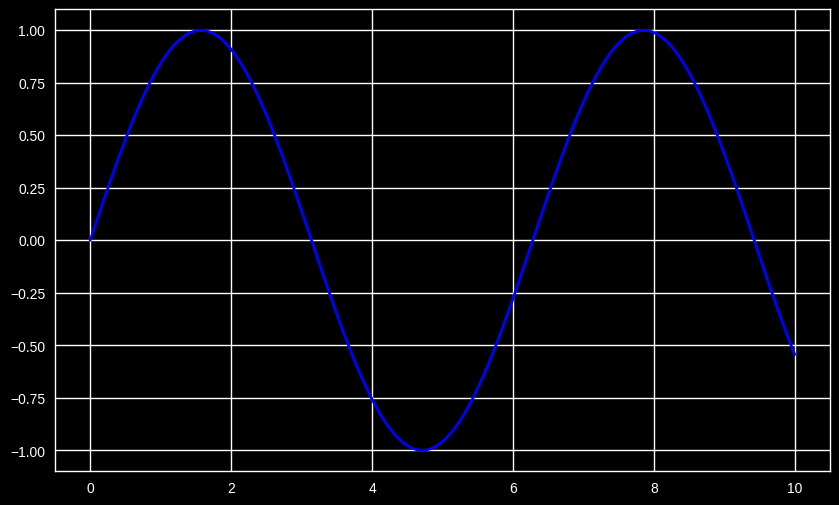

In [51]:
fig, ax = plt.subplots()
ax.plot(x, y, 'b-', linewidth=2)
plt.show()

- Here the call `fig, ax = plt.subplots()` returns a pair, where
    - `fig` is a `Figure` instance—like a blank canvas.
    - `ax` is an `AxesSubplot` instance—think of a frame for plotting in.
- The `plot()` function is actually a method of `ax`.
- While there’s a bit more typing, the more explicit use of objects gives us better control.
- This will become more clear as we go along.

#### 2.2.3. Tweaks

- Here we’ve changed the line to red and added a legend

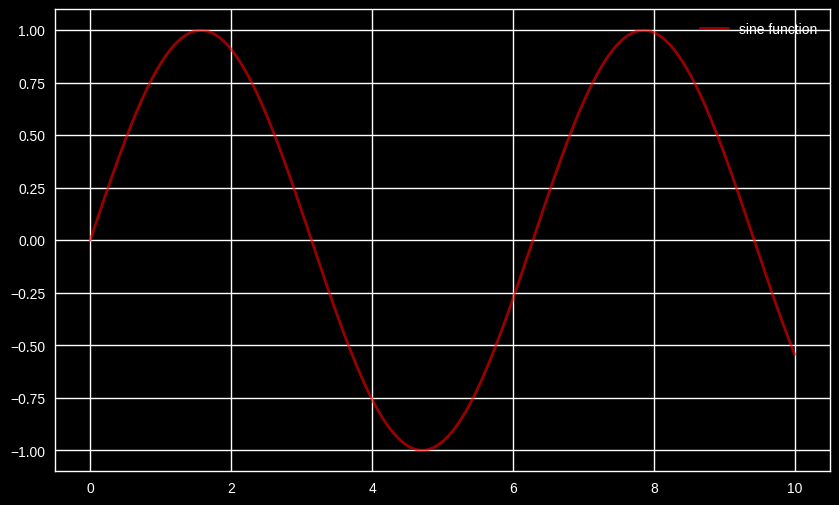

In [52]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend()
plt.show()

- We’ve also used `alpha` to make the line slightly **transparent**—which makes it look smoother.
- The location of the legend can be changed by replacing `ax.legend()` with `ax.legend(loc='upper center')`.

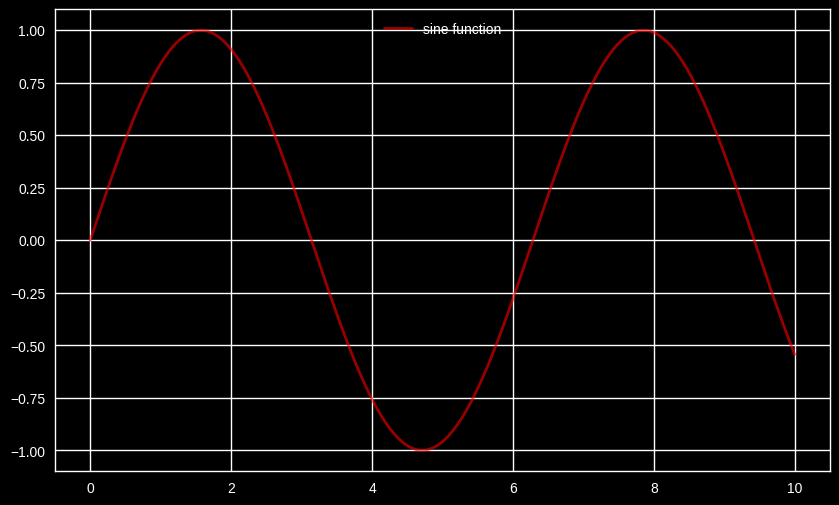

In [53]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='upper center')
plt.show()

- If everything is properly configured, then adding LaTeX is trivial

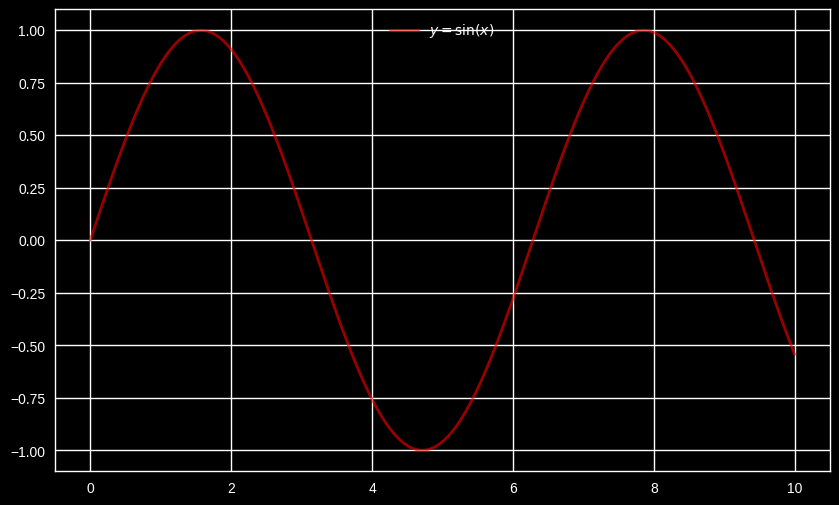

In [54]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
plt.show()

- Controlling the ticks, adding titles and so on is also straightforward

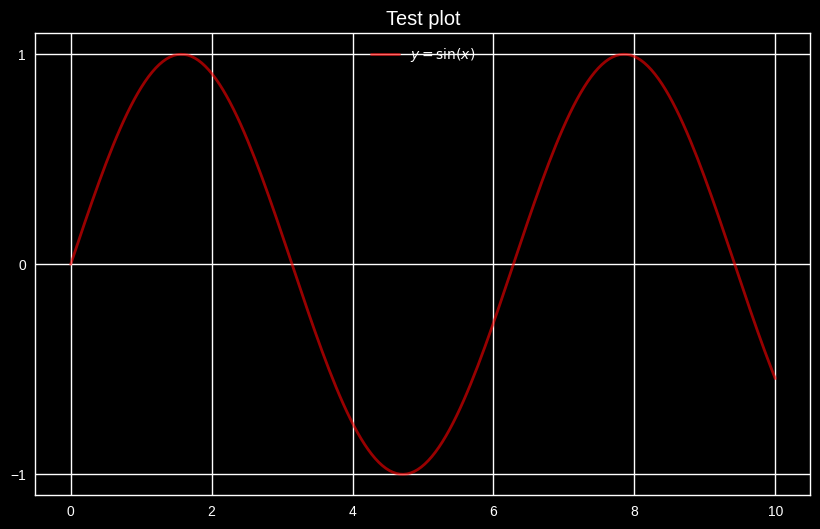

In [55]:
fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label='$y=\sin(x)$', alpha=0.6)
ax.legend(loc='upper center')
ax.set_yticks([-1, 0, 1])
ax.set_title('Test plot')
plt.show()

### 2.3. More Features

- Matplotlib has a huge array of functions and features, which you can discover over time as you have need for them.
- We mention just a few.

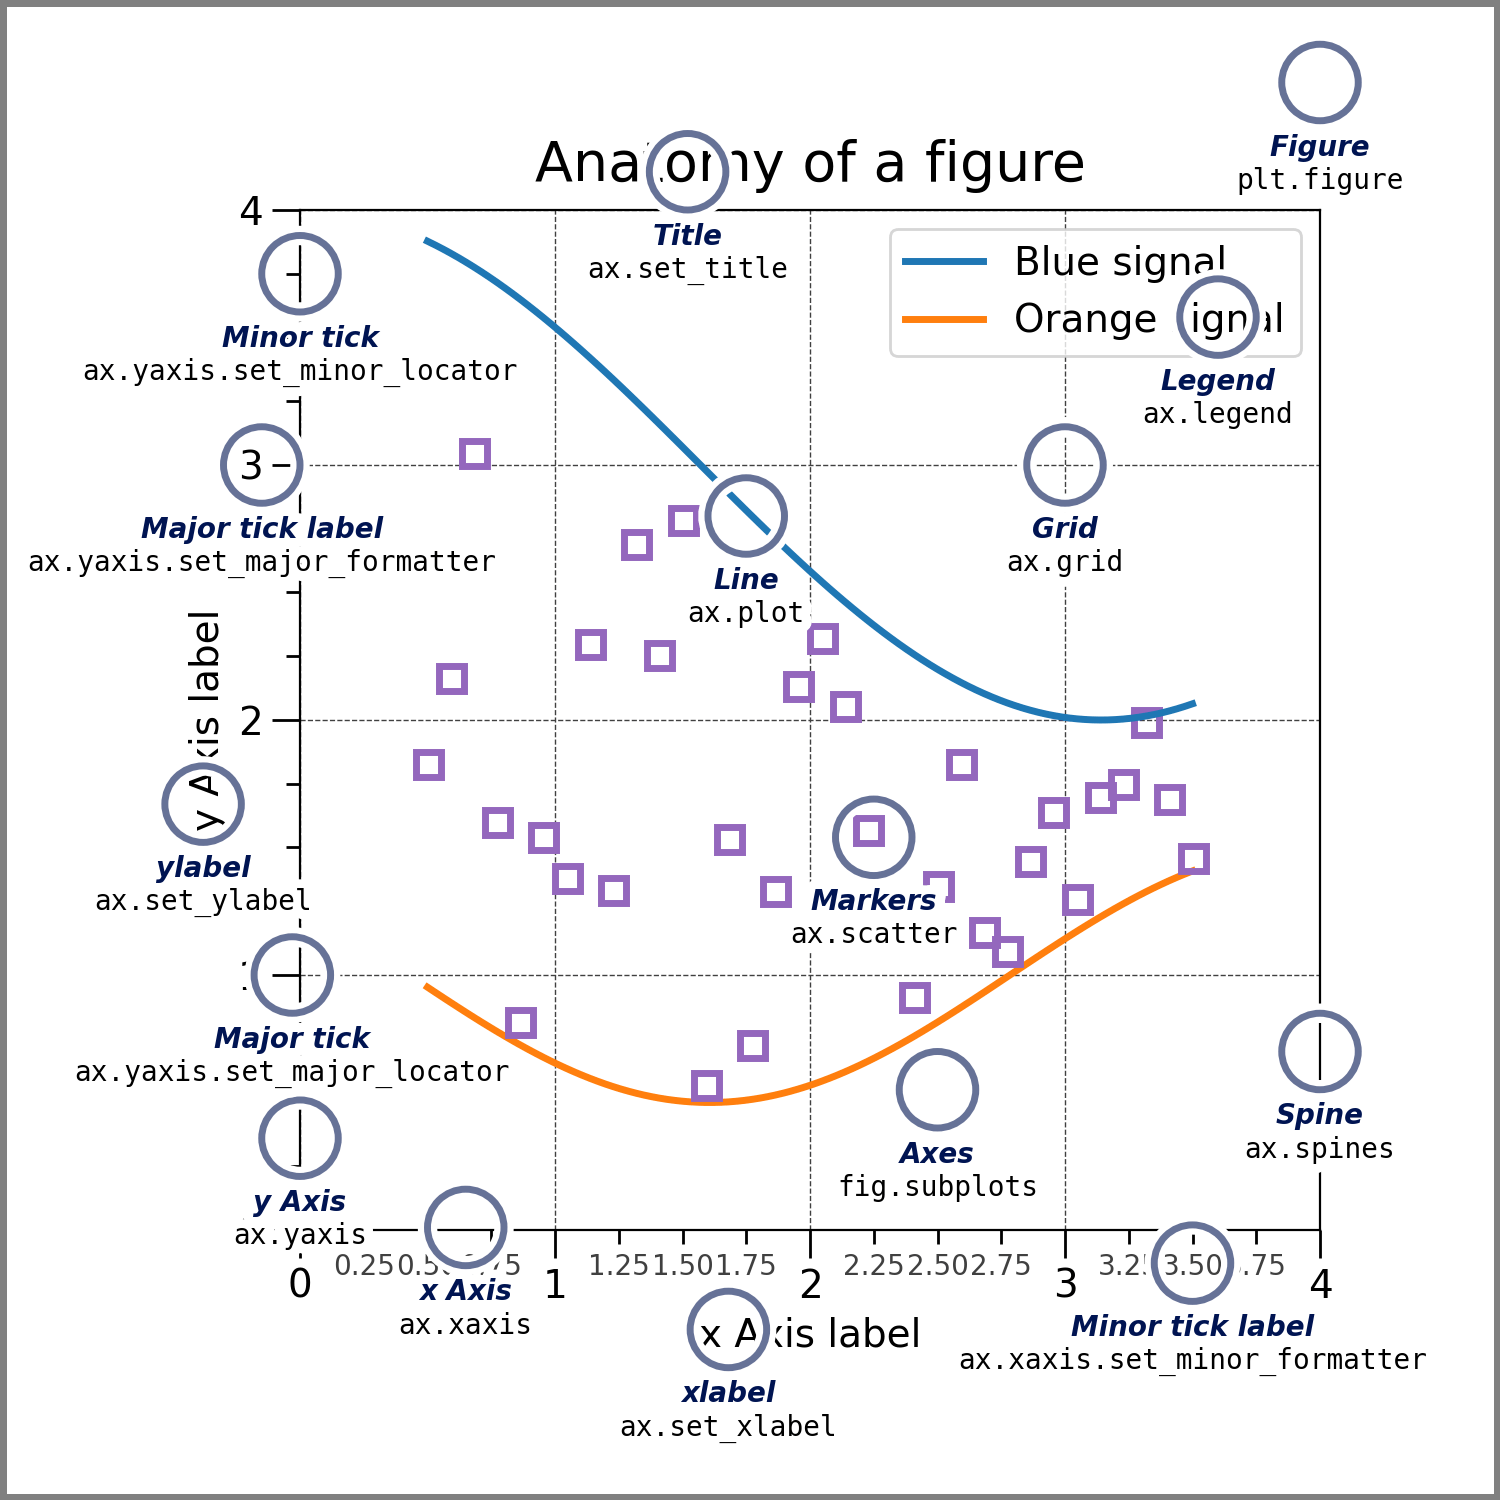

#### 2.3.1. Multiple Plots on One Axis

- It’s straightforward to generate multiple plots on the same axes.
- Here’s an example that randomly generates three normal densities and adds a label with their mean.

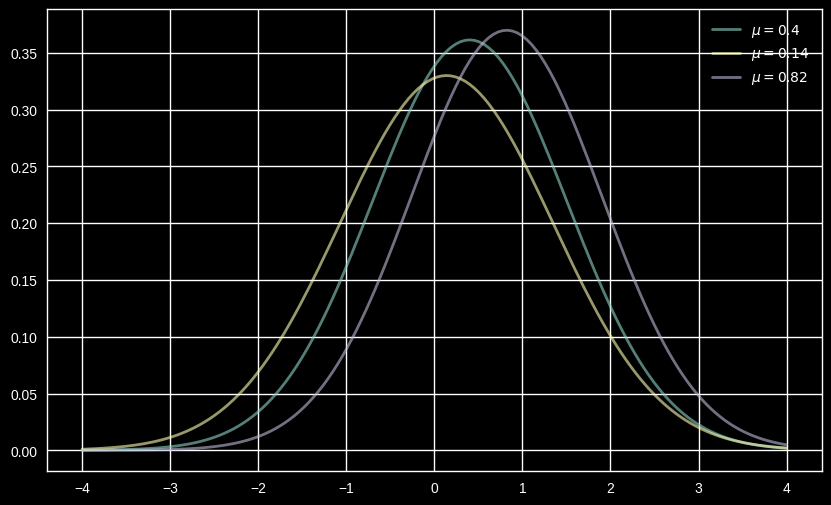

In [56]:
from scipy.stats import norm
from random import uniform

fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = f'$\mu = {m:.2}$'
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
ax.legend()
plt.show()

#### 2.3.2. Multiple Subplots

- Sometimes we want multiple subplots in one figure.
- Here’s an example that generates 6 histograms

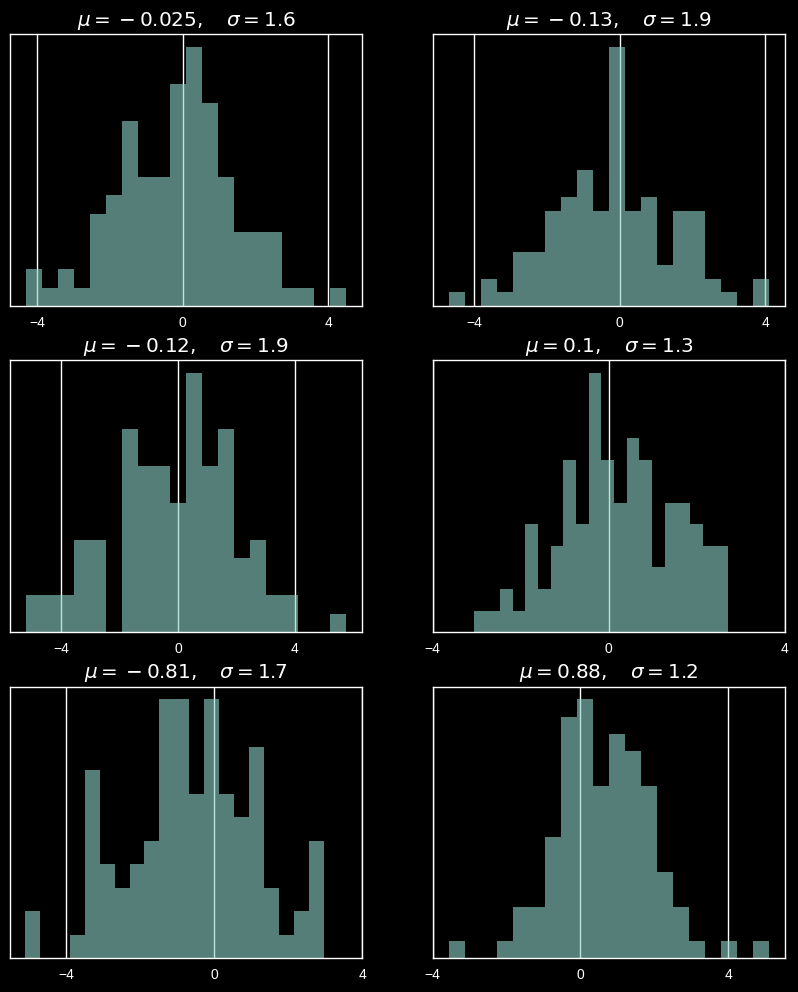

In [57]:
num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))
for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1, 1), uniform(1, 2)
        x = norm.rvs(loc=m, scale=s, size=100)
        axes[i, j].hist(x, alpha=0.6, bins=20)
        t = f'$\mu = {m:.2}, \quad \sigma = {s:.2}$'
        axes[i, j].set(title=t, xticks=[-4, 0, 4], yticks=[])
plt.show()

#### 2.3.3. 3D Plots

- Matplotlib does a nice job of 3D plots — here is one example

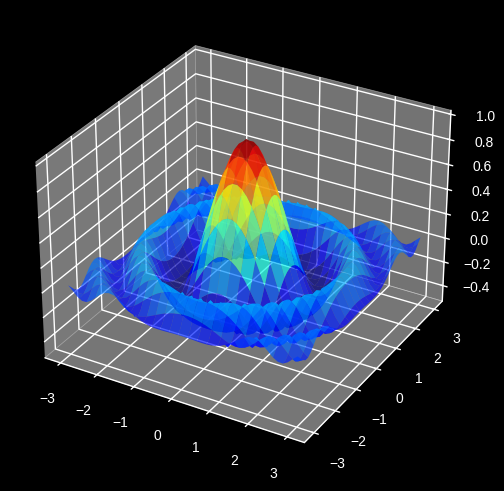

In [58]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm


def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
                y,
                f(x, y),
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.7,
                linewidth=0.25)
ax.set_zlim(-0.5, 1.0)
plt.show()

#### 2.3.4. A Customizing Function

- Perhaps you will find a set of customizations that you regularly use.
- Suppose we usually prefer our axes to go through the origin, and to have a grid.
- Here’s a nice example from Matthew Doty of how the object-oriented API can be used to build a custom `subplots` function that implements these changes.
- Read carefully through the code and see if you can follow what’s going on

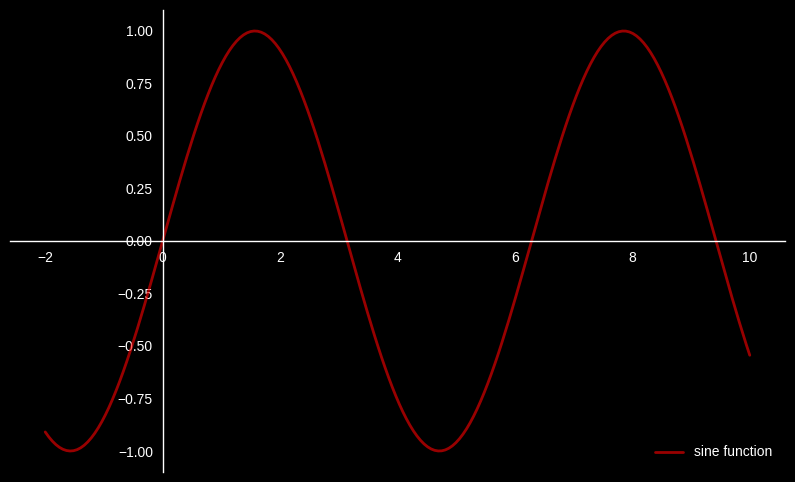

In [59]:
def subplots():
    "Custom subplots with axes through the origin"
    fig, ax = plt.subplots()

    # Set the axes through the origin
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position('zero')
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    ax.grid()
    return fig, ax


fig, ax = subplots()  # Call the local version, not plt.subplots()
x = np.linspace(-2, 10, 200)
y = np.sin(x)
ax.plot(x, y, 'r-', linewidth=2, label='sine function', alpha=0.6)
ax.legend(loc='lower right')
plt.show()

- The custom `subplots` function
    1. calls the standard `plt.subplots` function internally to generate the `fig`, `ax` pair,
    2. makes the desired customizations to `ax`, and
    3. passes the `fig`, `ax` pair back to the calling code.

#### 2.3.4. Style Sheets

- Another useful feature in Matplotlib is [style sheets](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).
- We can use style sheets to create plots with uniform styles.
- We can find a list of available styles by printing the attribute `plt.style.available`.

In [60]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


- We can now use the `plt.style.use()` method to set the style sheet.
- Let’s write a function that takes the name of a style sheet and draws different plots with the style

In [61]:
def draw_graphs(style='default'):

    # Setting a style sheet
    plt.style.use(style)

    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
    x = np.linspace(-13, 13, 150)

    # Set seed values to replicate results of random draws
    np.random.seed(9)

    for i in range(3):

        # Draw mean and standard deviation from uniform distributions
        m, s = np.random.uniform(-8, 8), np.random.uniform(2, 2.5)

        # Generate a normal density plot
        y = norm.pdf(x, loc=m, scale=s)
        axes[0].plot(x, y, linewidth=3, alpha=0.7)

        # Create a scatter plot with random X and Y values
        # from normal distributions
        rnormX = norm.rvs(loc=m, scale=s, size=150)
        rnormY = norm.rvs(loc=m, scale=s, size=150)
        axes[1].plot(rnormX, rnormY, ls='none', marker='o', alpha=0.7)

        # Create a histogram with random X values
        axes[2].hist(rnormX, alpha=0.7)

        # and a line graph with random Y values
        axes[3].plot(x, rnormY, linewidth=2, alpha=0.7)

    plt.suptitle(f'Style: {style}', fontsize=13)
    plt.show()

- Let’s see what some of the styles look like.
- First, we draw graphs with the style sheet `seaborn`.

<ipython-input-61-1f39a4714239>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


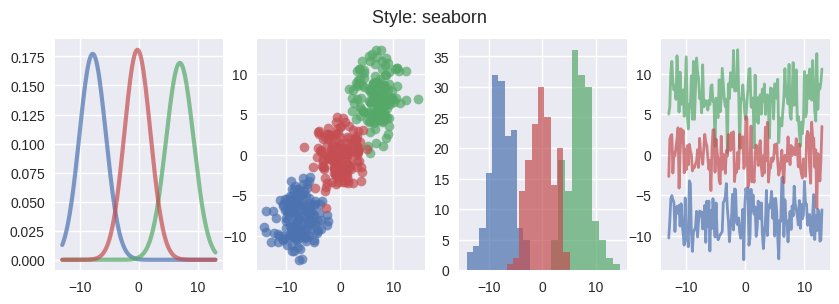

In [62]:
draw_graphs(style='seaborn')

- We can use `grayscale` to remove colors in plots

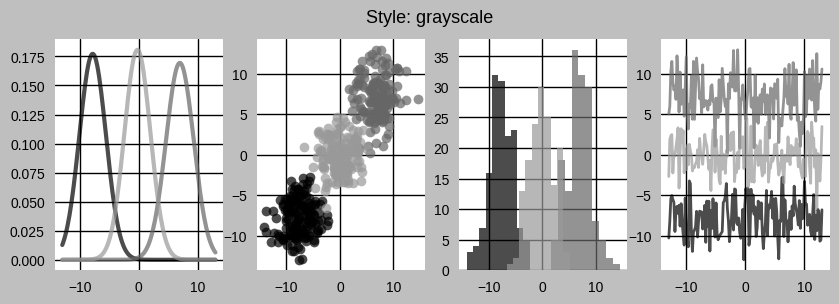

In [63]:
draw_graphs(style='grayscale')

- Here is what `ggplot` looks like

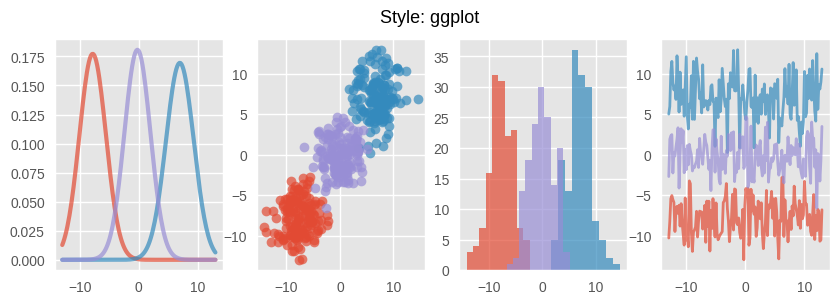

In [64]:
draw_graphs(style='ggplot')

- We can also use the style `dark_background`

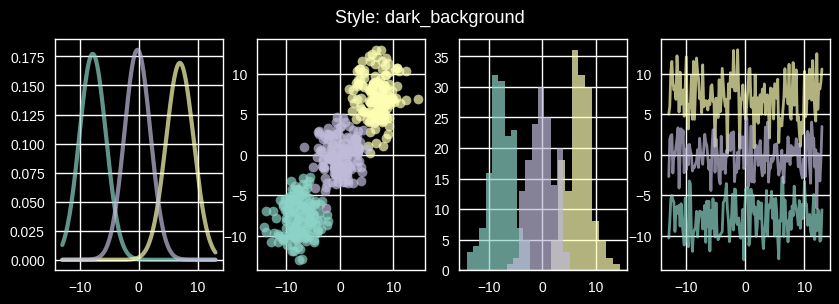

In [65]:
draw_graphs(style='dark_background')

- You can use the function to experiment with other styles in the list.
- If you are interested, you can even create your own style sheets.
- Parameters for your style sheets are stored in a dictionary-like variable `plt.rcParams`.

In [66]:
print(plt.rcParams.keys())

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': 'black',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': True,
          'axes.grid.axis': 'both

- There are many parameters you could set for your style sheets.
- Set parameters for your style sheet by:
    1. creating your own `matplotlibrc` file, or
    2. updating values stored in the dictionary-like variable `plt.rcParams`
- Let’s change the style of our overlaid density lines using the second method

In [67]:
from cycler import cycler

# set to the default style sheet
plt.style.use('default')

# You can update single values using keys:

# Set the font style to italic
plt.rcParams['font.style'] = 'italic'

# Update linewidth
plt.rcParams['lines.linewidth'] = 2


# You can also update many values at once using the update() method:

parameters = {

    # Change default figure size
    'figure.figsize': (5, 4),

    # Add horizontal grid lines
    'axes.grid': True,
    'axes.grid.axis': 'y',

    # Update colors for density lines
    'axes.prop_cycle': cycler('color',
                            ['dimgray', 'slategrey', 'darkgray'])
}

plt.rcParams.update(parameters)

> - These settings are `global`.
> - Any plot generated after changing parameters in `.rcParams` will be affected by the setting.

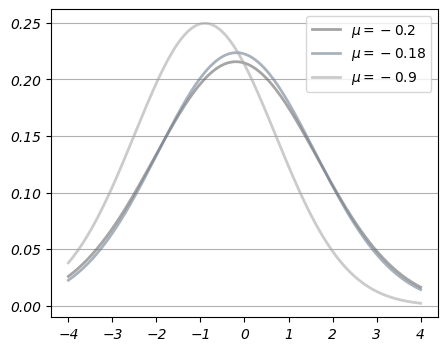

In [68]:
fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = f'$\mu = {m:.2}$'
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
ax.legend()
plt.show()

- Apply the `default` style sheet again to change your style back to default

In [69]:
plt.style.use('default')

# Reset default figure size
plt.rcParams['figure.figsize'] = (10, 6)

- Here are more [examples](https://www.datafantic.com/the-magic-of-matplotlib-stylesheets/) on how to change these parameters.

**[Exercise]**
- Plot the function

$$f(x) = \cos(\pi \theta x) \exp(-x)$$

- over the interval $[0,5]$ for each $\theta$ in `np.linspace(0, 2, 10)`.
- Place all the curves in the same figure.
- The output should look like this:

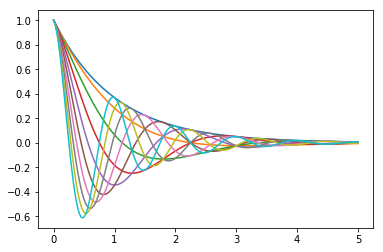

### 2.4. Further Reading

- The [Matplotlib gallery](https://matplotlib.org/2.0.2/gallery.html) provides many examples.
- A nice [Matplotlib tutorial](http://scipy-lectures.org/intro/matplotlib/index.html) by Nicolas Rougier, Mike Muller and Gael Varoquaux.
- [mpltools](http://tonysyu.github.io/mpltools/index.html) allows easy switching between plot styles.
- [Seaborn](https://github.com/mwaskom/seaborn) facilitates common statistics plots in Matplotlib.

## **3. Linear Algebra**

- Many problems in economics and finance require solving linear equations.
- In this section, we discuss linear equations and their applications.
- To illustrate the importance of linear equations, we begin with a two good model of supply and demand.
- The two good case is so simple that solutions can be calculated by hand.
- But often we need to consider markets containing many goods.
- In this case we face large systems of linear equations, with many equations and unknowns.
- To handle such systems we need two things:
    - matrix algebra (and the knowledge of how to use it) plus
    - computer code to apply matrix algebra to the problems of interest.
- This note covers these steps.
- We will use the following imports:

In [71]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  # set default figure size

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp2d
from scipy.linalg import inv, solve, det, eig

### 3.1. Two Good Examples to Begin with

- In this section we discuss a simple two good example and solve it by
    1. pencil and paper
    2. matrix algebra
- The second method is more general, as we will see.

#### 3.1.1. Pencil and Paper Methods

- Suppose that we have two related goods, such as
    - propane and ethanol
    - rice and wheat, etc.
- To keep things simple, we label them as good 0 and good 1.
- The **demand** for each good depends on the price of both goods:

$$\begin{matrix} q_0^d = 100 - 10p_0 -5p_1 \\ q_1^d = 50 - p_0 - 10p_1 \end{matrix} \tag{1}$$

(We are assuming demand decreases when the price of either good goes up, but other cases are also possible.)

- Let’s suppose that **supply** is given by

$$\begin{matrix} q_0^s = 10p_0 + 5p_1 \\ q_1^s = 5 p_0 + 10p_1 \end{matrix} \tag{2}$$

- Equilibrium holds when **supply equals demand** ($q_0^s = q_0^d$ and $q_1^s = q_1^d$).
- This yields the linear system

$$\begin{matrix} 100 - 10p_0 -5p_1 = 10p_0 + 5p_1 \\ 50 - p_0 - 10p_1 = 5 p_0 + 10p_1 \end{matrix} \tag{3}$$

- We can solve this with pencil and paper to get

$$p_0 = 4.41,\ p_1 = 1.18$$

- Inserting these results into either (1) or (2) yields the equilibrium quantities

$$ q_0 = 50,\ q_1=33.82$$

#### 3.1.2. Looking Forward

- Pencil and paper methods are easy in the two good case.
- But what if there are many goods?
- For such problems we need matrix algebra.
- Before solving problems with matrix algebra, let’s first recall **the basics of vectors and matrices, in both theory and computation**.

### 3.2. Vectors

- Look `3.2` in https://python.quantecon.org/linear_algebra.html

### 3.3. Matrices

- Look `3.3` at https://python.quantecon.org/linear_algebra.html

### 3.4. Solving Systems of Equations

- Look `3.4` at https://python.quantecon.org/linear_algebra.html

### 3.5. Complex Numbers and Trigonometry

- Look https://python.quantecon.org/complex_and_trig.html

### 3.6. Eigenvalues and Eigenvectors

- Look https://intro.quantecon.org/eigen_I.html

### 3.7. Further Topics

- Look `3.6` at https://python.quantecon.org/linear_algebra.html and solve Exercise 1.

### 3.8. QR-Decomposition

- Look https://python.quantecon.org/qr_decomp.html

### 3.9. Example 1: Portfolios

- Look **Portfolios** at https://datascience.quantecon.org/scientific/applied_linalg.html and solve Exercise 1, 2

### 3.10. Example 2: Unemployment Dynamics

- Look **Unemployment Dynamics** at https://datascience.quantecon.org/scientific/applied_linalg.html and solve Exercise 3